# PRACTICAL 1

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [83]:
df = pd.read_csv('./datasets/wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [84]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [85]:
df["Customer_Segment"].unique()

array([1, 2, 3])

In [86]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [87]:
X = df.drop(columns = ['Customer_Segment'])
y = df['Customer_Segment']

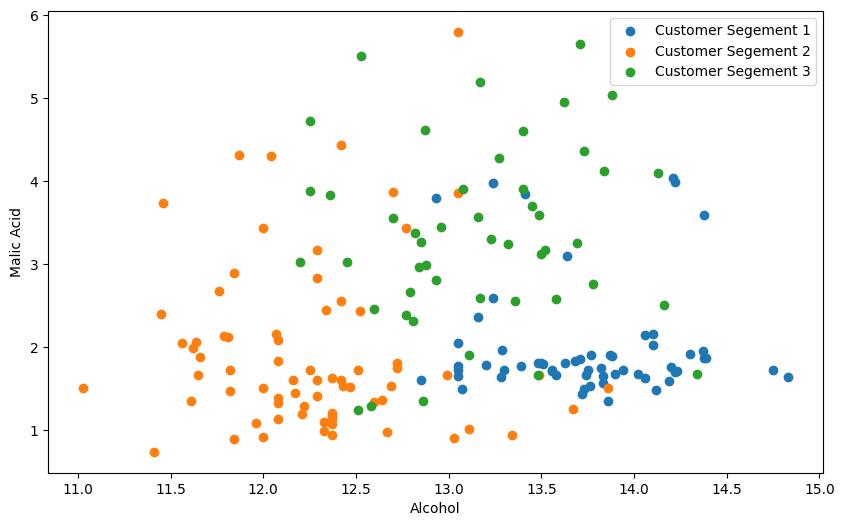

In [88]:
plt.figure(figsize = (10, 6))
plt.scatter(X[y == 1]['Alcohol'], X[y == 1]['Malic_Acid'], label = "Customer Segement 1")
plt.scatter(X[y == 2]['Alcohol'], X[y == 2]['Malic_Acid'], label = "Customer Segement 2")
plt.scatter(X[y == 3]['Alcohol'], X[y == 3]['Malic_Acid'], label = "Customer Segement 3")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.legend()
plt.show()

In [89]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [90]:
pca = PCA(n_components = 2)

In [91]:
pca_table = pca.fit_transform(X_scaled)

In [92]:
new_df = pd.DataFrame(data = pca_table, columns = ['PC 1', 'PC 2'])
new_df.head()

,PC 1,PC 2,PC 3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [93]:
new_df['Customer_Segment'] = y
new_df.head()

,PC 1,PC 2,PC 3,Customer_Segment
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


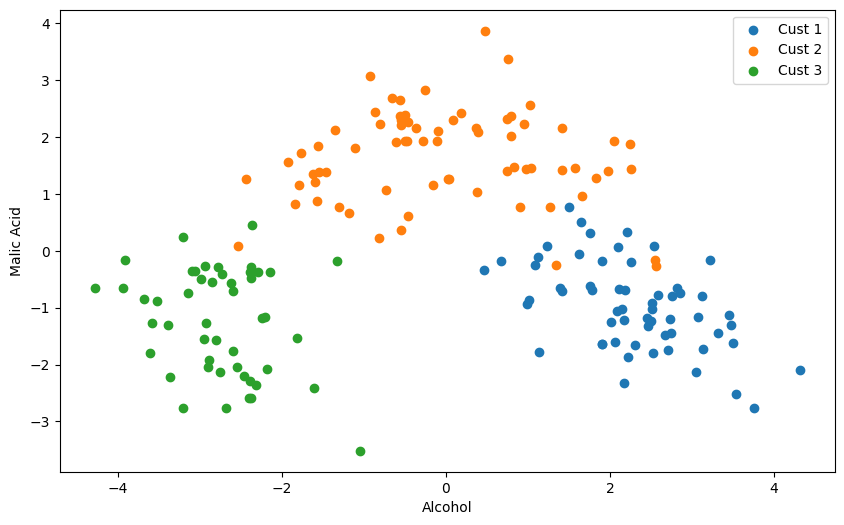

In [95]:
plt.figure(figsize = (10, 6))
plt.scatter(new_df[new_df['Customer_Segment'] == 1]['PC 1'], new_df[new_df['Customer_Segment'] == 1]['PC 2'], label = "Cust 1")
plt.scatter(new_df[new_df['Customer_Segment'] == 2]['PC 1'], new_df[new_df['Customer_Segment'] == 2]['PC 2'], label = "Cust 2")
plt.scatter(new_df[new_df['Customer_Segment'] == 3]['PC 1'], new_df[new_df['Customer_Segment'] == 3]['PC 2'], label = "Cust 3")
plt.legend()
plt.show()

# Practical 2

# Practical 3

In [99]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics

In [100]:
digits = datasets.load_digits()

In [101]:
X = digits.data
y = digits.target

#digit col -> target variable
#X = data.drop(columns = ['digit'])
#y = data['digit']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [103]:
classifier = svm.SVC(kernel = 'linear')

In [105]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [108]:
y_pred = classifier.predict(X_test)

In [110]:
metrics.accuracy_score(y_test, y_pred)

0.9638888888888889

In [112]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.89      1.00      0.94        31
           2       0.97      1.00      0.99        35
           3       1.00      0.90      0.95        31
           4       0.97      0.97      0.97        34
           5       0.97      0.97      0.97        30
           6       1.00      0.97      0.99        39
           7       0.97      0.97      0.97        39
           8       0.95      0.93      0.94        44
           9       0.92      0.94      0.93        35

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



In [113]:
print(metrics.confusion_matrix(y_test, y_pred))

[[41  0  0  0  1  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  1  1  1]
 [ 0  1  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  1  0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  1]
 [ 0  2  1  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  1  0  0  1 33]]


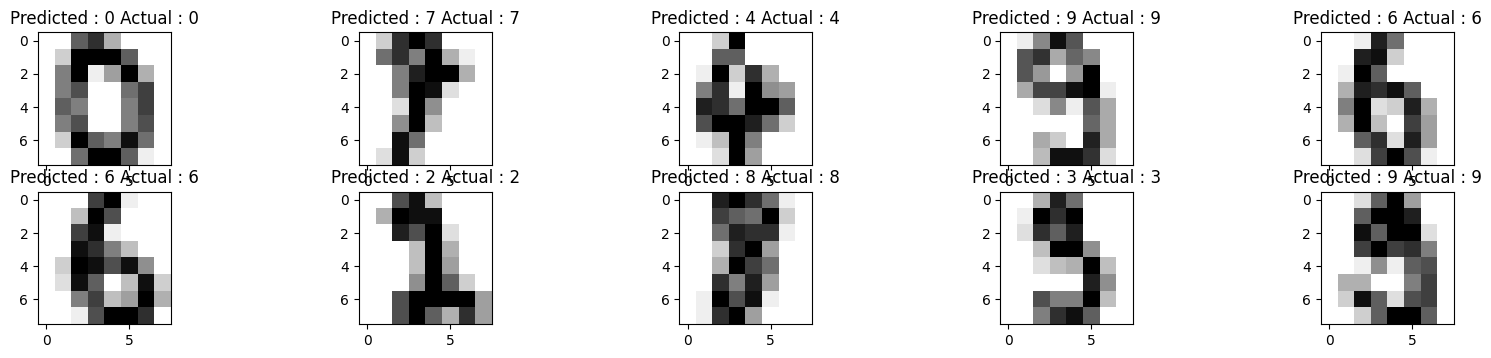

In [121]:
plt.figure(figsize = (20, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap = plt.cm.gray_r)
    plt.title(f"Predicted : {y_pred[i]} Actual : {y_test[i]}")
    plt.show()

# Practical 4

In [153]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [154]:
df = pd.read_csv("./datasets/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [155]:
X = df.drop(columns = ['Species'])
y = df['Species']

In [156]:
encoder = LabelEncoder()
y_encoded = pd.DataFrame(encoder.fit_transform(y))

In [157]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [158]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

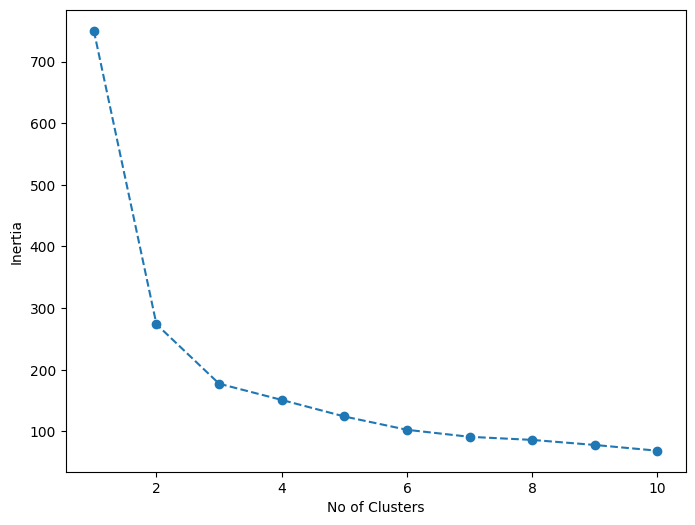

In [159]:
plt.figure(figsize = (8, 6))
plt.plot(range(1, 11), inertia, marker = 'o', linestyle = '--')
plt.xlabel("No of Clusters")
plt.ylabel("Inertia")
plt.show()

# Practical 5

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [174]:
data = pd.read_csv("./datasets/car_evaluation.csv")
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [175]:
data = data.apply(LabelEncoder().fit_transform)

In [176]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [177]:
X = data.drop(columns = ['unacc'])
y = data['unacc']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [179]:
rfc = RandomForestClassifier(n_estimators = 100)

In [180]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [181]:
y_pred = rfc.predict(X_test)

In [183]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        67
           1       1.00      0.81      0.90        16
           2       0.99      0.98      0.99       253
           3       1.00      0.90      0.95        10

    accuracy                           0.97       346
   macro avg       0.97      0.92      0.94       346
weighted avg       0.97      0.97      0.97       346



In [184]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 65   0   2   0]
 [  3  13   0   0]
 [  4   0 249   0]
 [  1   0   0   9]]
